# Homework 1
You should have downloaded the following files as well:
1. matrix.csv
2. stocks.csv

Goal: Practice basic usage of jupyter notebook, numpy, scipy, pandas, and matplotlib. 

If you are unfamiliar with how to use certain functions, look up the documentation online. This skill will be very useful, in general. Alternatively, seek help from your TAs.

## 1 Basic numpy
### 1.1 Load data with numpy
[1 pt] load "matrix.csv" as a numpy array named $\texttt{data}$. The imported array should be 20 rows by 3 columns. (Hint: You can use np.loadtxt(), make sure to specify correct delimiter argument.)

In [1]:
import numpy as np
data = np.loadtxt('matrix.csv', delimiter=',')
print(f"data shape {data.shape}")

data shape (20, 3)


### 1.2 Row sum
1. [1 pt] Define array $\texttt{rowsum}$ where each entry represents the row sum of matrix. Print $\texttt{rowsum}$. (hint: use np.sum() function, make sure to use the correct axis)

In [2]:
rowsum = np.sum(data, axis=1)
print(f"rowsum {rowsum}")

rowsum [ 0.4844172  -2.50909969  1.30264396 -0.84740315  0.42729788 -2.15017789
 -0.47559022  2.54880877  0.09423786 -0.67330205 -1.77558698 -1.52911637
  0.77690753 -0.33742036  0.99610406  1.65417497  1.03753238 -1.84411077
  1.21671237  2.10183057]


2. [1 pt] Define array, $\texttt{idx}$, containing indices of rowsum that have values greater than 1. Print $\texttt{idx}$. (hint: use np.where() function)

In [3]:
idx = np.where(rowsum > 1)[0]
print(f"idx {idx}")

idx [ 2  7 15 16 18 19]


### 1.3 Compute length
Now, view each row of the 20 by 3 array as a vector in $\mathbb{R}^3$.

[1 pt] Find the (Euclidean) length of vector (i.e., each row), store it as $\texttt{distances}$. Print the $\texttt{distances}$. (You may compute it via formula or use numpy functions, in which case be careful you use the right arguments). 

In [5]:
print(f"data {data}")
distances = np.linalg.norm(data, axis=1)
print(f"distances {distances}")

data [[ 1.62434536 -0.61175641 -0.52817175]
 [-1.07296862  0.86540763 -2.3015387 ]
 [ 1.74481176 -0.7612069   0.3190391 ]
 [-0.24937038  1.46210794 -2.06014071]
 [-0.3224172  -0.38405435  1.13376944]
 [-1.09989127 -0.17242821 -0.87785842]
 [ 0.04221375  0.58281521 -1.10061918]
 [ 1.14472371  0.90159072  0.50249434]
 [ 0.90085595 -0.68372786 -0.12289023]
 [-0.93576943 -0.26788808  0.53035547]
 [-0.69166075 -0.39675353 -0.6871727 ]
 [-0.84520564 -0.67124613 -0.0126646 ]
 [-1.11731035  0.2344157   1.65980218]
 [ 0.74204416 -0.19183555 -0.88762896]
 [-0.74715829  1.6924546   0.05080775]
 [-0.63699565  0.19091548  2.10025514]
 [ 0.12015895  0.61720311  0.30017032]
 [-0.35224985 -1.1425182  -0.34934272]
 [-0.20889423  0.58662319  0.83898341]
 [ 0.93110208  0.28558733  0.88514116]]
distances [1.8143068  2.68277327 1.93017874 2.53852811 1.23971116 1.41778972
 1.24612124 1.54134966 1.13759713 1.10846984 1.05262257 1.07939999
 2.01451642 1.1727385  1.85073756 2.20301698 0.696764   1.24557943
 1.

### 1.4 Plot histogram
Definition: A _density histogram_ is a histogram that is normalized so that the total area under the bars sums to unity. 

[2 pt] Using matplotlib, plot a density histogram of the length of vectors. Make your bins between 0.5 to 3.0, with increments of 0.5. (So, you should have 5 bins)

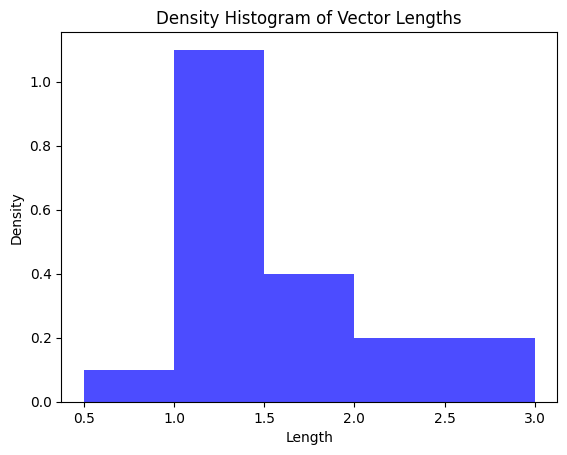

In [6]:
import matplotlib.pyplot as plt

# Define bins for the histogram
bins = np.arange(0.5, 3.5, 0.5)

# Plotting the density histogram
plt.hist(distances, bins=bins, density=True, alpha=0.7, color='blue')
plt.title('Density Histogram of Vector Lengths')
plt.xlabel('Length')
plt.ylabel('Density')

# Show the plot
plt.show()

## 2 Sampling and statistics: stock returns
### 2.1 Load data with pandas
1. [1 pt] **Using pandas**, load "stocks.csv" on monthly stock returns from 1926 to 2021 ([source](https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html)) as $\texttt{stocks}$. (Hint: use the pandas read_csv() function)
2. [1 pt] Define numpy array $\texttt{ret}$ as the values of the "Mkt-RF" column in the dataset. (Hint: use the .values method.)

In [7]:
import pandas as pd
stocks = pd.read_csv('stocks.csv')
print(f"stocks head {stocks.head()}")
ret = stocks["Mkt-RF"].values
print(f"ret {ret}")

stocks head    Mkt-RF   SMB   HML    RF
0    2.96 -2.56 -2.43  0.22
1    2.64 -1.17  3.82  0.25
2    0.36 -1.40  0.13  0.23
3   -3.24 -0.09  0.70  0.32
4    2.53 -0.10 -0.51  0.31
ret [2.96 2.64 0.36 ... 0.35 6.46 3.21]


### 2.2 Compute mean and std
1. [1 pt] Define $\texttt{n}$ as the number of entries/length of $\texttt{ret}$. You must use some function which extracts the length or shape of $\texttt{ret}$, i.e., not manually counting it.
2. [1 pt] Define $\texttt{ret\_mean}$ as the mean of $\texttt{ret}$.
3. [1 pt] Define $\texttt{ret\_std}$ as the unbiased estimate of standard deviation of $\texttt{ret}$.

(You can use numpy or scipy functions to compute them. Unbiased estimates of std will affect degree of freedom argument.)

In [8]:
n = len(ret)
ret_mean = np.mean(ret)
ret_std = np.std(ret, ddof=1)
print(f"n {n} ret_mean {ret_mean} ret_std {ret_std}")

n 1165 ret_mean 0.6785064377682404 ret_std 5.344533755747503


### 2.3 Plot histogram
1. [2 pts] Plot a density histogram of the returns $\texttt{ret}$ with 100 equispaced bins from -30 to +40.

2. [2 pts] On the same axes/figure, plot the PDF of a normal distribution over the histogram, with
- mean equal to $\texttt{ret\_mean}$ and 
- standard deviation equal to $\texttt{ret\_std}$ 

(Hint: you can use scipy stats norm.pdf() function to help you)

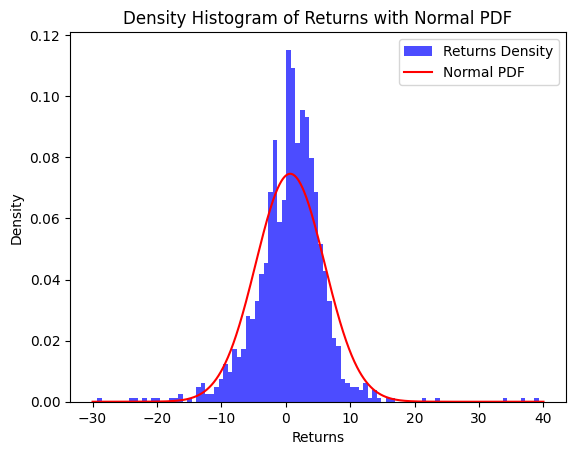

In [11]:
from scipy.stats import norm

# 1. Plotting the density histograms of thed returns
plt.hist(ret, bins = 100, range = (-30, 40), density=True, alpha=0.7, color="blue", label="Returns Density")

# 2. Plotting a PDF of normal distribution over the histogram
x = np.linspace(-30, 40, 1000)  
pdf = norm.pdf(x, ret_mean, ret_std)
plt.plot(x, pdf, 'r-', label="Normal PDF")

plt.title("Density Histogram of Returns with Normal PDF")
plt.xlabel("Returns")
plt.ylabel("Density")
plt.legend()

# Show the plot
plt.show()

### 2.4 Skew and Kurtosis of ret
[2 pt] What is the unbiased skew and kurtosis of $\texttt{ret}$? Compute and print them to 5 decimal places. (You may use scipy.stats skew and kurtosis functions.)



In [12]:
from scipy.stats import skew, kurtosis

ret_skew = skew(ret, bias=False)
ret_kurt = kurtosis(ret, bias=False)

print(f"Unbiased Skew: {ret_skew:.5f}")
print(f"Unbiased Kurtosis: {ret_kurt:.5f}")

Unbiased Skew: 0.15628
Unbiased Kurtosis: 7.45038


### 2.5 Generate data from normal distribution
[1 pt] Repeat the following 10 times with a for-loop:

1. [1 pt] Generate $n$ samples from the univariate normal distribution, storing it as $\texttt{sim\_data}$ with 
- mean equal $\texttt{ret\_mean}$ 
- standard deviation equal $\texttt{ret\_std}$
- random_state equal to the index $\texttt{i}$ of the for-loop

(You can use norm.rvs() function.)

2. [1 pt] What is the unbiased skew and kurtosis of these samples $\texttt{sim\_data}$? Print them to 5 decimal places, like in the previous part.

In [13]:
for i in range(10):
    sim_data = norm.rvs(loc=ret_mean, scale=ret_std, size=n, random_state=i)

    sim_skew = skew(sim_data, bias=False)
    sim_kurt = kurtosis(sim_data, bias=False)

    print(f"Simulation {i+1}: Skew = {sim_skew:.5f}, Kurtosis = {sim_kurt:.5f}")

Simulation 1: Skew = 0.04652, Kurtosis = -0.02398
Simulation 2: Skew = -0.06788, Kurtosis = 0.20701
Simulation 3: Skew = 0.18888, Kurtosis = 0.23654
Simulation 4: Skew = -0.01437, Kurtosis = -0.04768
Simulation 5: Skew = 0.08344, Kurtosis = -0.07050
Simulation 6: Skew = -0.02381, Kurtosis = 0.17714
Simulation 7: Skew = -0.09616, Kurtosis = 0.04727
Simulation 8: Skew = -0.07774, Kurtosis = -0.13742
Simulation 9: Skew = 0.00661, Kurtosis = -0.03881
Simulation 10: Skew = -0.07220, Kurtosis = -0.12243


### 2.6 Discuss if ret data is normally distributed
[2 pt] Explain in what ways the stock returns do not resemble a normal distribution. Your response should compare skew and kurtosis you computed and the plots you generated in the previous parts.

**Ans:** In a normal distribution skewness should be close to zero since it is a symmetrical distribution. This is further explained in the 10 simulations ran. However, the skewness in our data is quite high at 0.15628, which is unlike a normal distribution. In addition, the kurtosis is way too high, suggesting the tails are too fat (Black Swan event). All of these results are further explained in the plots generated with the normal density in red and the density histogram. 